In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
df=pd.read_csv("C:/Users/pcc/Downloads/Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [23]:
status=[]
for i in df["Taxable.Income"]:
    if i<= 30000:
        status.append("Risky")
    else:
        status.append("Good")


In [24]:
df["status"]=status
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [25]:
df["status"].value_counts()

Good     476
Risky    124
Name: status, dtype: int64

In [26]:
df["Undergrad"].unique()

array(['NO', 'YES'], dtype=object)

In [27]:
df["Marital.Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [28]:
lb=LabelEncoder()
df[["Undergrad","Marital.Status","Urban","status"]]=df[["Undergrad","Marital.Status","Urban","status"]].apply(lb.fit_transform)

In [29]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [30]:
df.drop("Taxable.Income",axis=1,inplace=True)

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Build Decision Tree Algorithm using entropy

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [110]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3 )
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

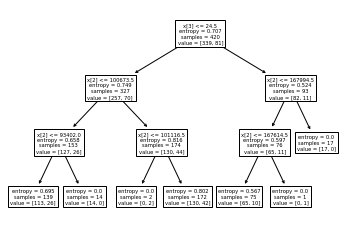

In [111]:
plot_tree(model)
plt.show()

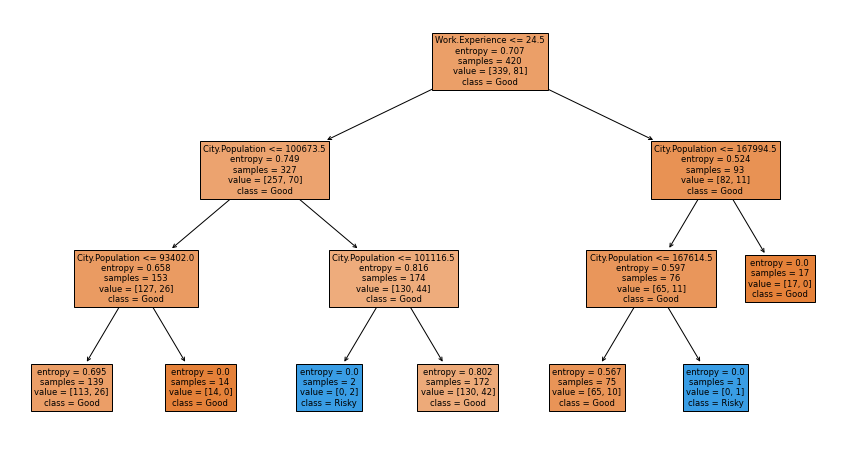

In [112]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn=["Good","Risky"]

plt.figure(figsize=(15,8))
plot_tree(model,max_depth=5,feature_names=fn,
         class_names=cn,filled=True)
plt.show()

In [113]:
pred=model.predict(x_test)

In [114]:
pd.DataFrame({"Actual":y_test,"predicted":pred})

,Actual,predicted
434,1,0
122,1,0
224,0,0
479,0,0
205,1,0
...,...,...
249,0,0
357,1,0
455,0,0
493,1,0


In [115]:
np.mean(y_test==pred)

0.7611111111111111

In [116]:
confusion_matrix(y_test,pred)

array([[137,   0],
       [ 43,   0]], dtype=int64)

In [117]:
classification_report(y_test,pred)

C:\Users\pcc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcc\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.86       137\n           1       0.00      0.00      0.00        43\n\n    accuracy                           0.76       180\n   macro avg       0.38      0.50      0.43       180\nweighted avg       0.58      0.76      0.66       180\n'

## Building Decision Tree using Gini 

In [170]:
model_1=DecisionTreeClassifier(criterion="gini",max_depth=5)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

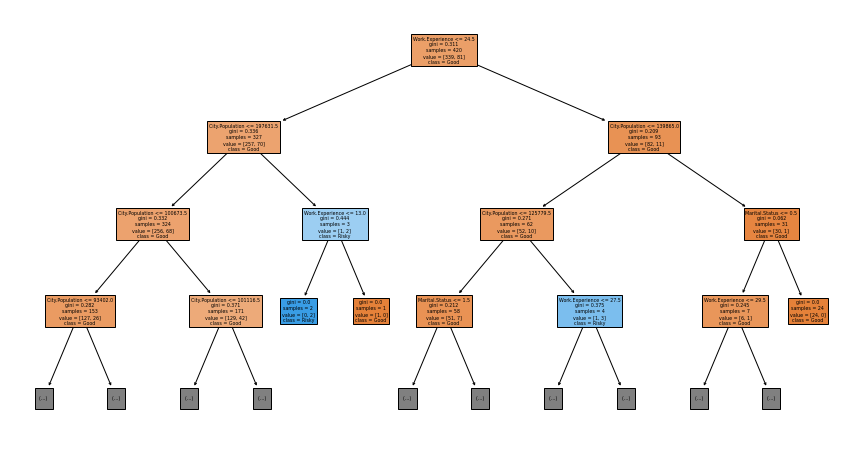

In [171]:
plt.figure(figsize=(15,8))
plot_tree(model_1,max_depth=3,class_names=cn,feature_names=fn,filled=True)
plt.show()

In [172]:
pred_1=model_1.predict(x_test)
pred_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [173]:
np.mean(y_test==pred_1)

0.7444444444444445

In [174]:
confusion_matrix(y_test,pred_1)

array([[131,   6],
       [ 40,   3]], dtype=int64)